# INTRODUCTION
Cardiovascular diseases (CVD) are a major cause of mortality worldwide. Early detection and management of CVD risk factors are crucial for preventing cardiovascular events. This project aims to develop a machine learning model for predicting the risk of cardiovascular disease based on various demographic and health-related features.

The dataset used for this project contains information about individuals and their risk factors for cardiovascular disease. It includes features such as age, gender, height, weight, blood pressure (ap_hi and ap_lo), cholesterol level, glucose level, smoking status, alcohol consumption, and physical activity. The target variable indicates the presence or absence of cardiovascular disease.


# Import the necessary libraries

In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import tensorflow as tf

# Loading the Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/medical_examination.csv")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Data Cleaning

In [ ]:
#Change height from cm to m
data['height']=data['height']/100

In [ ]:
#Create the overweight column in the df variable
bmi=data['weight']/(data['height']*data['height'])
data['overweight'] = np.where(bmi>25,1,0)
data['overweight'].value_counts()

,count
overweight,
1,43546
0,26454


In [ ]:
#Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
data['cholesterol'] = np.where(data['cholesterol'] > 1, 1,0)
data['gluc'] = np.where(data['gluc'] > 1, 1,0)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


# Model Building

In [ ]:
#One hot encoding
df_final = pd.get_dummies(data, columns=['gender']).astype(int)

In [ ]:
df_final['age'].value_counts()
df_final['age_years'] = (df_final['age'] / 365.25).astype(int)

In [ ]:
df_final.head()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,gender_1,gender_2,gender_3,age_years
0,0,18393,1,62,110,80,0,0,0,0,1,0,0,0,1,0,50
1,1,20228,1,85,140,90,1,0,0,0,1,1,1,1,0,0,55
2,2,18857,1,64,130,70,1,0,0,0,0,1,0,1,0,0,51
3,3,17623,1,82,150,100,0,0,0,0,1,1,1,0,1,0,48
4,4,17474,1,56,100,60,0,0,0,0,0,0,0,1,0,0,47


In [ ]:
x = df_final[['age_years','ap_hi','ap_lo','cholesterol','active','gender_1','gender_2','gender_3']]
y = df_final['cardio']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_val_normalized = scaler.transform(x_val)
x_test_normalized = scaler.transform(x_test)


len(x_train), len(x_test), len(y_train),len(y_test), len(x_val), len(y_val)

(44800, 14000, 44800, 14000, 11200, 11200)

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

# Create a model
model_medical = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_medical.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])

# Fit the model
history = model_medical.fit(x_train_normalized, y_train, epochs=55, validation_data = (x_val_normalized, y_val), verbose=0)


In [ ]:
model_medical.evaluate(x_test_normalized, tf.cast(y_test, dtype=tf.float32))

438/438 [==============================] - 1s 1ms/step - loss: 0.5505 - accuracy: 0.7348


[0.55046147108078, 0.7347857356071472]

# Evaluating the perfomace of model

In [ ]:
y_pred = model_medical.predict(x_test_normalized)
y_pred = tf.round(y_pred)
print(y_pred[10])
print(y_test.iloc[10])

438/438 [==============================] - 1s 1ms/step
tf.Tensor([0.], shape=(1,), dtype=float32)
0


Text(0.5, 0, 'epochs')

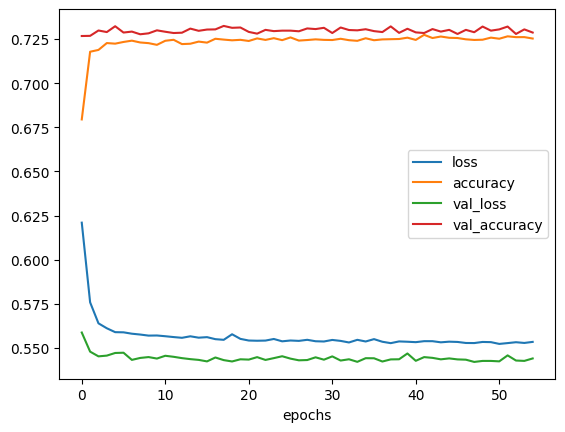

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.xlabel("epochs")

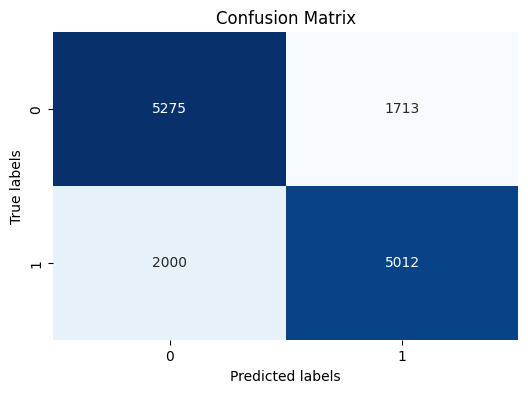

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Results
After training and evaluation, the best-performing model achieves an accuracy of approximately 74% on the validation set. While this accuracy is reasonable, further improvements can be explored by experimenting with different model architectures and hyperparameters.

# Conclusion
The CardioDetect project demonstrates the potential of machine learning in predicting cardiovascular disease risk based on individual risk factors. By leveraging machine learning techniques, healthcare professionals can potentially identify individuals at higher risk of CVD and intervene early to prevent adverse cardiovascular events.